## Exploratory Data Analysis (EDA)

We will be investigating India Airfare data and which features are most important in influencing fare.

In [2]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.

In [3]:
df = pd.read_csv('cleaned_dataset.csv')
print(df.shape)
df.head()

(452088, 13)


,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [4]:
df.dtypes

Date_of_journey       object
Journey_day           object
Airline               object
Flight_code           object
Class                 object
Source                object
Departure             object
Total_stops           object
Arrival               object
Destination           object
Duration_in_hours    float64
Days_left              int64
Fare                   int64
dtype: object

## Clean data

In [6]:
#split dates into month and day columns, we will not be doing a year column since this data is contained to the year 2023
df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])
df['Month'] = df['Date_of_journey'].dt.month
df['Day'] = df['Date_of_journey'].dt.day

print(df.head())

  Date_of_journey Journey_day    Airline Flight_code    Class Source  \
0      2023-01-16      Monday   SpiceJet     SG-8169  Economy  Delhi   
1      2023-01-16      Monday     Indigo     6E-2519  Economy  Delhi   
2      2023-01-16      Monday   GO FIRST      G8-354  Economy  Delhi   
3      2023-01-16      Monday   SpiceJet     SG-8709  Economy  Delhi   
4      2023-01-16      Monday  Air India      AI-805  Economy  Delhi   

    Departure Total_stops      Arrival Destination  Duration_in_hours  \
0  After 6 PM    non-stop   After 6 PM      Mumbai             2.0833   
1  After 6 PM    non-stop  Before 6 AM      Mumbai             2.3333   
2  After 6 PM    non-stop  Before 6 AM      Mumbai             2.1667   
3  After 6 PM    non-stop   After 6 PM      Mumbai             2.0833   
4  After 6 PM    non-stop   After 6 PM      Mumbai             2.1667   

   Days_left  Fare  Month  Day  
0          1  5335      1   16  
1          1  5899      1   16  
2          1  5801      1   1

In [7]:
columns = ['Date_of_journey', 'Airline','Flight_code', 'Class', 'Source', 'Departure', 'Arrival', 'Destination', 'Duration_in_hours','Days_left', 'Fare']
duplicates = df.duplicated(subset = columns, keep = False)
df[duplicates].sort_values(by = 'Date_of_journey')

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Month,Day
19210,2023-01-16,Monday,Vistara,UK-627,Economy,Delhi,12 PM - 6 PM,2+-stop,After 6 PM,Bangalore,29.9167,1,11117,1,16
129022,2023-01-16,Monday,Vistara,UK-853,Premium Economy,Mumbai,12 PM - 6 PM,2+-stop,6 AM - 12 PM,Kolkata,17.5833,1,20792,1,16
129023,2023-01-16,Monday,Vistara,UK-853,Premium Economy,Mumbai,12 PM - 6 PM,2+-stop,6 AM - 12 PM,Kolkata,17.5833,1,20792,1,16
129024,2023-01-16,Monday,Vistara,UK-853,Premium Economy,Mumbai,12 PM - 6 PM,2+-stop,6 AM - 12 PM,Kolkata,17.5833,1,20792,1,16
129025,2023-01-16,Monday,Vistara,UK-853,Premium Economy,Mumbai,12 PM - 6 PM,2+-stop,After 6 PM,Kolkata,26.0833,1,20792,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415131,2023-03-06,Monday,Vistara,UK-918,Premium Economy,Ahmedabad,Before 6 AM,1-stop,After 6 PM,Delhi,17.2500,50,13911,3,6
415132,2023-03-06,Monday,Vistara,UK-918,Premium Economy,Ahmedabad,Before 6 AM,1-stop,After 6 PM,Delhi,17.2500,50,13911,3,6
153847,2023-03-06,Monday,Vistara,UK-625,Premium Economy,Mumbai,6 AM - 12 PM,2+-stop,After 6 PM,Chennai,12.1667,50,16106,3,6
337936,2023-03-06,Monday,Vistara,UK-772,Economy,Kolkata,6 AM - 12 PM,1-stop,After 6 PM,Hyderabad,33.5833,50,11688,3,6


In [8]:
#get rid of the duplicates
df = df.drop_duplicates(subset=columns, keep='first')
print(df.head(10))

  Date_of_journey Journey_day    Airline Flight_code    Class Source  \
0      2023-01-16      Monday   SpiceJet     SG-8169  Economy  Delhi   
1      2023-01-16      Monday     Indigo     6E-2519  Economy  Delhi   
2      2023-01-16      Monday   GO FIRST      G8-354  Economy  Delhi   
3      2023-01-16      Monday   SpiceJet     SG-8709  Economy  Delhi   
4      2023-01-16      Monday  Air India      AI-805  Economy  Delhi   
5      2023-01-16      Monday  Air India      AI-605  Economy  Delhi   
6      2023-01-16      Monday  Air India      AI-814  Economy  Delhi   
7      2023-01-16      Monday   GO FIRST      G8-330  Economy  Delhi   
8      2023-01-16      Monday   SpiceJet     SG-2976  Economy  Delhi   
9      2023-01-16      Monday   GO FIRST      G8-346  Economy  Delhi   

    Departure Total_stops       Arrival Destination  Duration_in_hours  \
0  After 6 PM    non-stop    After 6 PM      Mumbai             2.0833   
1  After 6 PM    non-stop   Before 6 AM      Mumbai        

In [9]:
df.describe()

,Date_of_journey,Duration_in_hours,Days_left,Fare,Month,Day
count,445366,445366.000000,445366.000000,445366.000000,445366.000000,445366.000000
mean,2023-02-09 14:49:39.837706752,12.182491,25.617822,22919.747165,1.804707,16.031572
min,2023-01-16 00:00:00,0.750000,1.000000,1307.000000,1.000000,1.000000
25%,2023-01-28 00:00:00,6.500000,13.000000,8712.000000,1.000000,7.000000
50%,2023-02-10 00:00:00,11.250000,26.000000,13362.000000,2.000000,17.000000
75%,2023-02-22 00:00:00,16.333300,38.000000,36980.000000,2.000000,24.000000
max,2023-03-06 00:00:00,43.583300,50.000000,143019.000000,3.000000,31.000000
std,NaN,7.299361,14.302610,20394.214040,0.630021,9.086824


We will be focusing on the airfare column and how the other features (categorical and numerical) affect Fare. Here we see that the mean airfare is 22920 rupies, the max is about 143000 rupies. This seems like there may be a few outliers. The median may be a better indicator of the typical data point in this data. We can also indicate from the above statistics that the month column only ranges from the January 16 to March 6. Due to the limited range of dates we will split the dates into beginning, middle and end of month.

In [11]:
#the median fare is significantly lower than the mean fare
np.median(df[['Fare']])

13362.0

In [12]:
#here we split the month into beginning (days 1-10), middle (days 11-20), end (days 21-31)
df['Part of the month'] = pd.cut(df['Day'], bins=[0, 10, 20, 31], labels=['Beginning', 'Middle', 'End'], right=True)
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Month,Day,Part of the month
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,1,16,Middle
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,1,16,Middle
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,1,16,Middle
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,1,16,Middle
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,1,16,Middle


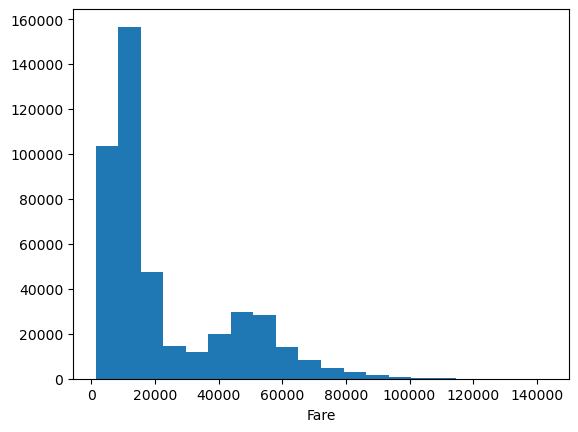

In [13]:
#we can make see that the fare feature is of bimodal distribution with right skew
plt.hist(df['Fare'], bins = 20)
plt.xlabel('Fare')
plt.show()

In [14]:
#this conveys that more economy seats were sold than any other type of seat and there were only 144 first class seats sold but there are only a few on each flight
#lets look more into first class tickets
df['Class'].value_counts()

Class
Economy            248323
Business           126535
Premium Economy     70364
First                 144
Name: count, dtype: int64

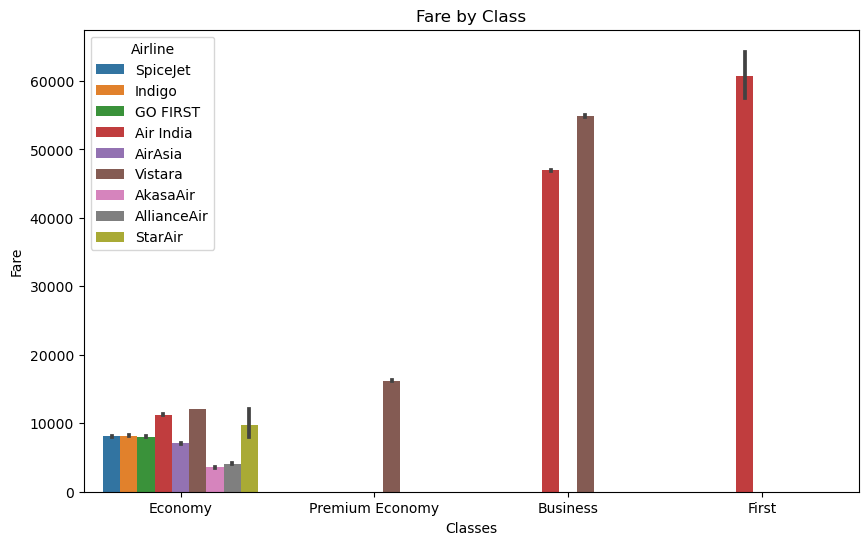

In [15]:
#The only airlines that have anything besides economy are air india and vistara. Due to this, we should focus solely on economy flights.
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Fare', hue='Airline', data=df)
plt.title("Fare by Class")
plt.xlabel("Classes")
plt.ylabel("Fare")
plt.show()

The histogram conveys that only Vistara and Air India are the only airlines that have premium economy, business, and first class seats. According to sundaygaurdianlive.com Vistara and Air India share the same parent company (Tata Group). These airlines both offer a luxurious experience which explains their higher airfare and why they may offer more availability in the premium seats. Let's combine the luxury seats into one label in the class column and name it premium.

In [17]:
df['Class'] = df['Class'].replace({'Premium Economy': 'Premium','Business': 'Premium', 'First': 'Premium' })

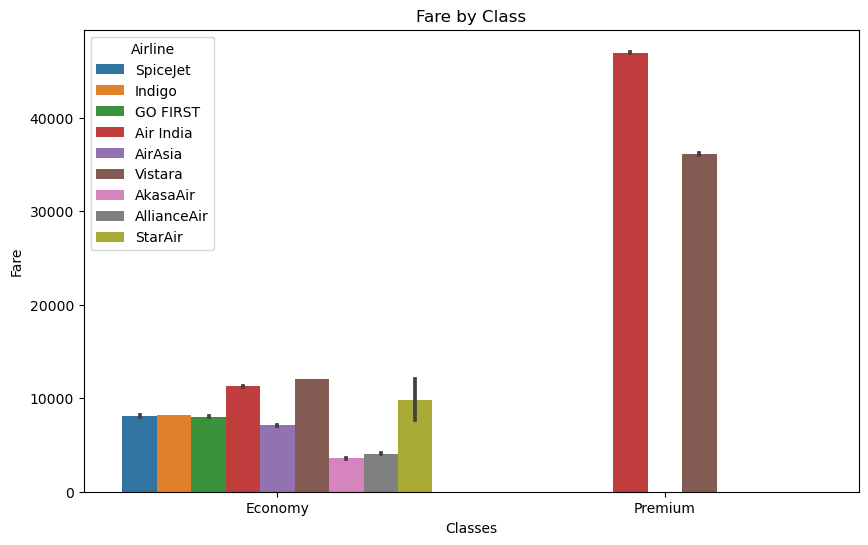

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Fare', hue='Airline', data=df)
plt.title("Fare by Class")
plt.xlabel("Classes")
plt.ylabel("Fare")
plt.show()

In [19]:
df["Route"] = df["Source"] + " to " + df["Destination"]
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Month,Day,Part of the month,Route
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,1,16,Middle,Delhi to Mumbai
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,1,16,Middle,Delhi to Mumbai
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,1,16,Middle,Delhi to Mumbai
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,1,16,Middle,Delhi to Mumbai
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,1,16,Middle,Delhi to Mumbai


In [20]:
bins = [0, 7, 30, float('inf')]
labels = ["Last-minute", "Short-notice", "Planned"]  # Define the categories
df["Booking_Category"] = pd.cut(df["Days_left"], bins=bins, labels=labels)
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Month,Day,Part of the month,Route,Booking_Category
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,1,16,Middle,Delhi to Mumbai,Last-minute
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,1,16,Middle,Delhi to Mumbai,Last-minute
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,1,16,Middle,Delhi to Mumbai,Last-minute
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,1,16,Middle,Delhi to Mumbai,Last-minute
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,1,16,Middle,Delhi to Mumbai,Last-minute


## Exploration of data

In [22]:
#the below function shows the highest frequency of each feature grouped by Airline
#Monday looks like a popular day to fly, Delhi is the most popular Source and destination, Arriving after 6 PM is very popular
#one layover is very common, Air India seems to have the longest flights  followed by Vistara
df.groupby('Airline').agg(lambda x: x.value_counts().index[0])

,Date_of_journey,Journey_day,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Month,Day,Part of the month,Route,Booking_Category
Airline,,,,,,,,,,,,,,,,,
Air India,2023-01-31,Monday,AI-559,Economy,Mumbai,6 AM - 12 PM,1-stop,After 6 PM,Mumbai,2.2500,16,54879,2,1,End,Delhi to Mumbai,Short-notice
AirAsia,2023-02-18,Monday,I5-612,Economy,Delhi,12 PM - 6 PM,1-stop,After 6 PM,Bangalore,7.8333,34,5167,2,18,End,Bangalore to Delhi,Short-notice
AkasaAir,2023-01-28,Monday,QP-1128,Economy,Bangalore,12 PM - 6 PM,non-stop,12 PM - 6 PM,Bangalore,1.7500,13,1918,2,24,End,Mumbai to Bangalore,Short-notice
AllianceAir,2023-02-05,Monday,9I-695,Economy,Hyderabad,6 AM - 12 PM,non-stop,After 6 PM,Hyderabad,1.5833,21,4642,2,3,End,Bangalore to Hyderabad,Short-notice
GO FIRST,2023-02-12,Monday,G8-537,Economy,Delhi,After 6 PM,1-stop,After 6 PM,Delhi,2.1667,28,7110,2,6,End,Delhi to Mumbai,Short-notice
Indigo,2023-03-01,Monday,6E-847,Economy,Delhi,12 PM - 6 PM,1-stop,After 6 PM,Delhi,6.6667,45,6507,2,16,End,Delhi to Mumbai,Short-notice
SpiceJet,2023-01-26,Monday,SG-445,Economy,Delhi,After 6 PM,1-stop,After 6 PM,Delhi,2.8333,11,5794,2,26,End,Delhi to Chennai,Short-notice
StarAir,2023-02-04,Thursday,S5-131,Economy,Bangalore,12 PM - 6 PM,non-stop,After 6 PM,Hyderabad,5.0833,20,4535,2,28,End,Bangalore to Hyderabad,Short-notice
Vistara,2023-01-31,Monday,UK-936,Premium,Mumbai,6 AM - 12 PM,1-stop,After 6 PM,Mumbai,11.4167,16,14447,2,27,End,Delhi to Mumbai,Short-notice


At first glance the highest frequency of the data grouped by airline conveys a load of important information. Such that the most common day of the week to fly is Mondays for almost every airline, this is most likely because it is the beginning of the work week and people may be more hesitant to fly on this day because they do not want to use another PTO day. The most frequent Class to fly in is economy because it is the most common and cheapest class to buy a seat in; although this is not true for Vistara which is a luxury airline and their most frequent tickets are in the premium class. It is also clear that the highest frequency for almost all airlines arrival flights are after 6 PM with one after noon, which can be due to the fact that getting to destinations takes about a whole day of travel especially if there is any connecting flights. On the other hand, it is easy to tell that the most popular times for departure flights are between noon and midnight, probably because people may want to sleep in before a flight takes off or maybe pack up and check out of the hotel if ending a vacation or alternatively may wait to leave until after a day of work for their vacation. The most common number of stops is one stop for most airlines with a few nonstop flights for the smaller airlines which may have limited availability in destinations. Duration in flights will always vary depending on how many layovers there are, how long layovers are, or how far a distance they may be traveling. Akasa has the lowest fare in terms of frequency and AirIndia has the highest fare, we will investigate this further. We have limited range on the month column, the only whole month we have is February, therefore it makes sense that February is the most frequent month in all the airlines. The most frequent day of travel ranges, we will investigate this relationship further later. The most common time of the month to travel for all airlines is at the end of the month, possibly because this is when many people get paid and may have more money available to spend. The most popular flights by airline are from Delhi to Mumbai, these are some of the most populated cities in India therefore they are hotspots for flights. Keeping all this in mind, we will explore the features further to establish a better understanding of the pattern of this dataset. First, lets look at the numerical data and how those features may affect airfare. 

In [24]:
# Calculate median fare for each route, median is used because it is a better measure of central tendency due to the many outliers
route_fare = df.groupby("Route")["Fare"].median().reset_index()
top_routes = route_fare.sort_values(by="Fare", ascending=False).head(5)
print(top_routes)

                   Route     Fare
5    Ahmedabad to Mumbai  18712.0
38     Mumbai to Chennai  16394.0
17     Chennai to Mumbai  15913.0
1   Ahmedabad to Chennai  15856.0
35     Kolkata to Mumbai  15838.0


In [25]:
# Calculate median fare for each route, median is used because it is a better measure of central tendency due to the many outliers
route_fare = df.groupby("Route")["Fare"].median().reset_index()
cheapest_routes = route_fare.sort_values(by="Fare").head(5)
print(cheapest_routes)

                     Route     Fare
8       Bangalore to Delhi  10337.5
19      Delhi to Bangalore  10439.0
24  Hyderabad to Ahmedabad  11033.5
6   Bangalore to Ahmedabad  11138.0
39         Mumbai to Delhi  11163.0


In [26]:
route_fare_bybooking = df.groupby("Booking_Category")["Fare"].median().reset_index()
top_routes_bybooking = route_fare_bybooking.sort_values(by="Fare", ascending=False).head()
print(top_routes_bybooking)

  Booking_Category     Fare
0      Last-minute  17625.0
1     Short-notice  13620.0
2          Planned  11933.0


/var/folders/k9/3xypn6l513b2t7_mcg1q1fdc0000gn/T/ipykernel_87777/4189072721.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  route_fare_bybooking = df.groupby("Booking_Category")["Fare"].median().reset_index()


In [27]:
day_fare = df.groupby("Journey_day")["Fare"].median().reset_index()
days = day_fare.sort_values(by="Fare", ascending=False)
print(days)

  Journey_day     Fare
3      Sunday  13866.0
2    Saturday  13700.0
6   Wednesday  13563.0
0      Friday  13305.0
1      Monday  13245.5
5     Tuesday  13060.0
4    Thursday  12960.0


In [28]:
departure_fare = df.groupby("Departure")["Fare"].median().reset_index()
departure = departure_fare.sort_values(by="Fare", ascending=False)
print(departure)

      Departure     Fare
1  6 AM - 12 PM  14212.0
2    After 6 PM  13451.0
0  12 PM - 6 PM  12780.0
3   Before 6 AM   9887.0


In [29]:
arrival_fare = df.groupby("Arrival")["Fare"].median().reset_index()
arrival = arrival_fare.sort_values(by="Fare", ascending=False)
print(arrival)

        Arrival     Fare
2    After 6 PM  14172.0
0  12 PM - 6 PM  13608.0
1  6 AM - 12 PM  12822.0
3   Before 6 AM   9840.0


In [30]:
stops_fare = df.groupby("Total_stops")["Fare"].median().reset_index()
stops = stops_fare.sort_values(by="Fare", ascending=False)
print(stops)

  Total_stops     Fare
1     2+-stop  14322.0
0      1-stop  14154.0
2    non-stop   6605.0


In [31]:
part_of_month_fare = df.groupby("Part of the month")["Fare"].median().reset_index()
part = part_of_month_fare.sort_values(by="Fare", ascending=False)
print(part)

  Part of the month     Fare
2               End  13971.0
1            Middle  13708.0
0         Beginning  12408.0


/var/folders/k9/3xypn6l513b2t7_mcg1q1fdc0000gn/T/ipykernel_87777/1670856293.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  part_of_month_fare = df.groupby("Part of the month")["Fare"].median().reset_index()


We can now see that flights to and from Mumbai are in general the most expensive. With Ahmedabad and Chennai close behind. Let's check the cheaper flights. Flights from Bangalore to Delhi and vice versa are the cheapest flights in India on these airlines. The most expensive flights by booking are ones that are booked at the last minute while the cheaper flights are planned further in advance. This is most likely because there are limited available seats and high demand from travelers who need to book last minute, due to emergencies and business needs. It is also conveyed through the Journey_day feature that Sunday is the most expensive day to fly based on the median and that Thursday is the cheapest by about 1000 rupies, this is possibly because people are trying to come home before the work week starts therefore a higher price can try to persuade them to fly another day with more available seats at a cheaper price. We can also see that the departure flights are the most expensive from 6AM to noon  and the cheapest before 6 AM due to sleeping convenience, while arrival is most expensive the latter half of the day. The most expensive number of stops is anything more than 1 stop because multiple planes means more jet fuel and more employees to pay therefore it costs more. The end of the month is more expensive to fly possibly because it is also in high demand because of business travel, payday travel, holiday travel, etc. Let's look into these features further.

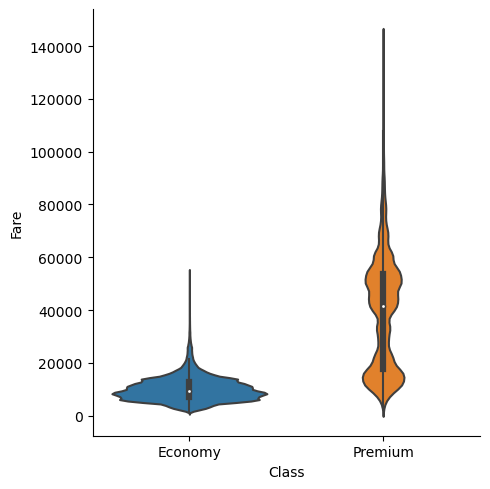

In [33]:
sns.catplot(
    data=df, x="Class", y="Fare", kind="violin",
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'SpiceJet'),
  Text(1, 0, 'Indigo'),
  Text(2, 0, 'GO FIRST'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'AirAsia'),
  Text(5, 0, 'Vistara'),
  Text(6, 0, 'AkasaAir'),
  Text(7, 0, 'AllianceAir'),
  Text(8, 0, 'StarAir')])

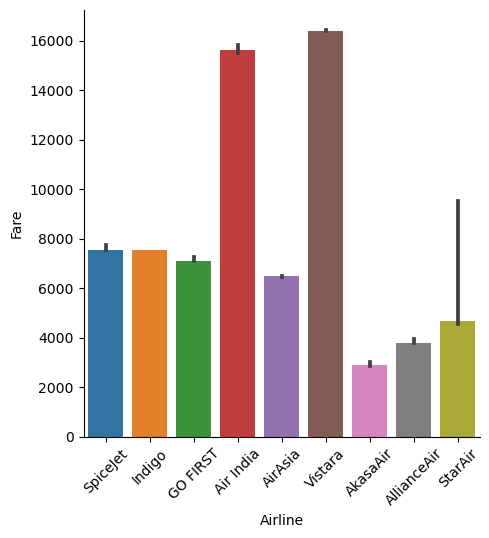

In [34]:
sns.catplot(
    data=df, x="Airline", y="Fare", kind="bar",estimator='median',
)
plt.xticks(rotation=45)

This violin plot of classes vs fare convey that there is a higher probability that a flyer will take on airfare in the economy class that is about 0-20000 rupies. On the other hand, Premium airfare has a much larger spread and has two ranges of which customers are willing to pay for premium seats which is about 20000 rupies and 40000-60000 rupies, with a smaller probability for customers to choose an airfare in these ranges. The two different possibilities in ranges in price for premium is most likely due to the different types of premium seats such as business and first class. Vistara and AirIndia have the most expensive airfare due to the luxury travel experience and more availability of premium tickets. AkasaAir, AllianceAir, StarAir, and AirAsia have the lowest airfare prices, these are most likely budget airlines and may have limited destinations, stops, etc. Let's explore further.

/var/folders/k9/3xypn6l513b2t7_mcg1q1fdc0000gn/T/ipykernel_87777/927979573.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_df, x="Airline", y="Fare", ci=None, estimator='median')


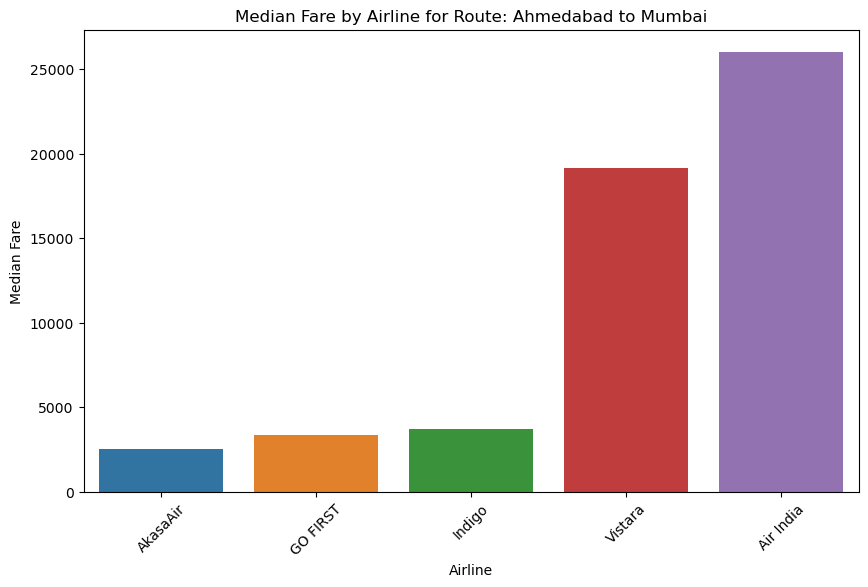

In [36]:
route_to_plot = "Ahmedabad to Mumbai"
filtered_df = df[df["Route"] == route_to_plot]
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df, x="Airline", y="Fare", ci=None, estimator='median')
plt.title(f"Median Fare by Airline for Route: {route_to_plot}")
plt.xlabel("Airline")
plt.ylabel("Median Fare")
plt.xticks(rotation=45)
plt.show()

/var/folders/k9/3xypn6l513b2t7_mcg1q1fdc0000gn/T/ipykernel_87777/4094359063.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_df, x="Airline", y="Fare", ci=None, estimator='median')


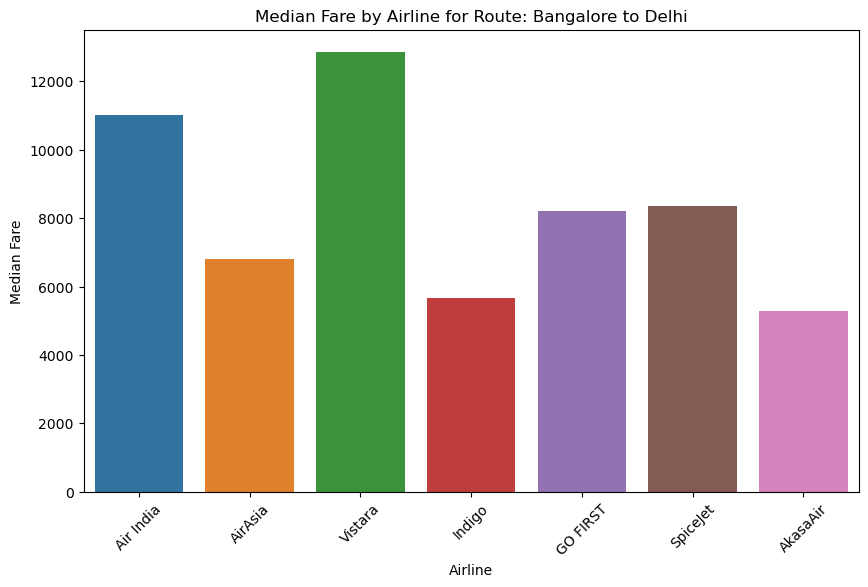

In [37]:
route_to_plot = "Bangalore to Delhi"
filtered_df = df[df["Route"] == route_to_plot]
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df, x="Airline", y="Fare", ci=None, estimator='median')
plt.title(f"Median Fare by Airline for Route: {route_to_plot}")
plt.xlabel("Airline")
plt.ylabel("Median Fare")
plt.xticks(rotation=45)
plt.show()

/var/folders/k9/3xypn6l513b2t7_mcg1q1fdc0000gn/T/ipykernel_87777/2364168425.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_df, x="Airline", y="Fare", ci=None, estimator='median')


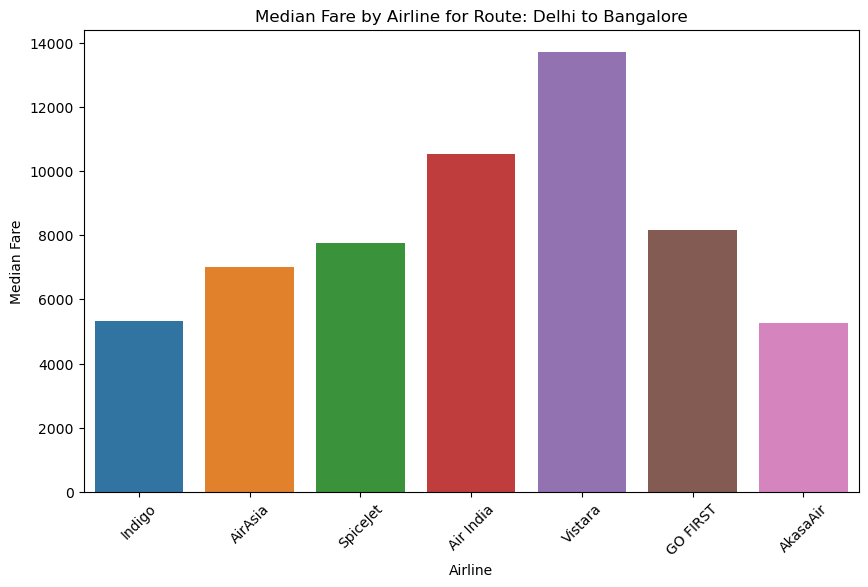

In [38]:
route_to_plot = "Delhi to Bangalore"
filtered_df = df[df["Route"] == route_to_plot]
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df, x="Airline", y="Fare", ci=None, estimator='median')
plt.title(f"Median Fare by Airline for Route: {route_to_plot}")
plt.xlabel("Airline")
plt.ylabel("Median Fare")
plt.xticks(rotation=45)
plt.show()

We can see here that the cheapest and most expensive routes are the most expensive on AirIndia and Vistara, we realize these airlines will always be more expensive because they provide a luxury experience. It is also noted that the most expensive route is limited to only 5 airlines, excluding Spicejet, StarAir, and AirAsia which may be budget airlines, while the cheapest route is available amongst all airlines, due to its high demand by customers. We can also note that the cheapest flights for these routes are on AkasaAir and Indigo. Lastly, we will explore the numerical data.

/Users/lupecovarrubias/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


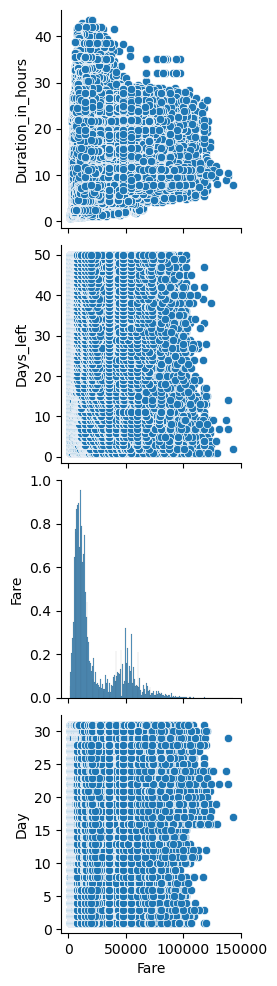

In [77]:
numerical_data = df[['Duration_in_hours','Days_left','Fare','Day']]
#this shows us that there is no correlation between Fare and any of the other numerical features, therefore we will focus on how the categorical features effect airfare
sns.pairplot(numerical_data, kind='scatter', x_vars = 'Fare')

We can see there is no correlation bewteen any of the numerical features and Fare.

The EDA process revealed key relationships and patterns in the airfare dataset. Notably, the Class, Route, Airline, Journey_day, Departure/Arrival, and Total_stops feautures have a strong impact on Fare, while last minute bookings have significantly higher fares than planned ones. Right-skewness in the Fare distribution and a few extreme outliers convey that airfare varies greatly and is common in airfare data because of seasonality and demand peaks, booking time such as last-minute bookings, nonstop vs connecting flights, etc. The newly created Route and Part of the month features appear promising for predictive modeling, as well as Airlines, Journey_day, and Booking_Category. In the next steps, we will address these findings through feature engineering and prepare the data for modelling.